#  1. Use ​ CIFAR-10 ​ dataset, [80 marks + 20 Bonus]
a. Implement a ​ 6-layer CNN network (Choose your own architecture) to
perform classification, use the same training and testing data split as
given in the dataset, Report the following

i.
Accuracy on test data by varying the ​ Optimization Techniques
1. Vanilla SGD [5 marks]
2. SGD with momentum. [5 marks]
3. Adam [5 marks]

ii.
Accuracy on test data by varying the ​ Normalization Techniques
1. Dropout [10 marks]
2. Batch Normalization. [10 marks]

iii.
Accuracy on test data by varying ​ activation function ​ in between
CNN layers​ ,
1. Identity. [5 marks]
2. Sigmoid. [5 marks]
3. ReLU. [5 marks]
4. Tanh. [5 marks]

iv.
Accuracy on test data by varying the ​ loss functions
1. Cross-Entropy Loss [5 marks]
2. MSELoss [5 marks]
3. L1 Loss [5 marks]

In [ ]:
# Importing library


import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.optim as optim
import torchvision.transforms as transforms

## Data Visualization

In [ ]:
# Downloading and Loading Data Set

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


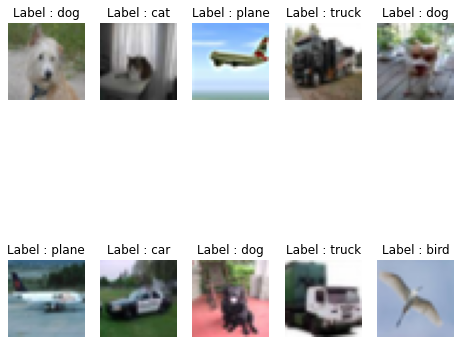

In [ ]:
# Visualising 10 random sample from training data
indexes = np.random.randint(0, trainset.data.shape[0], size=10)

plt.figure(figsize=(8, 8))

for i in range(len(indexes)):
    sub = plt.subplot(2, 5, i + 1)
    image = trainset.data[indexes[i]]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    sub.set_title("Label : " + str(classes[int(trainset.targets[indexes[i]])]))
plt.show()
plt.close('all')

## CNN Model

6 Convolution Layer and 4 Fully Connected Layer

In [ ]:

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() 
      
        self.conv1 = nn.Conv2d(3, 6, 3)  # 32x32x3 ---> 30x30x6  

        self.pool = nn.MaxPool2d(2, 2)   # 30x30x6 ---> 15x15x6
        #self.dropout = nn.Dropout2d(p=0.2)

        self.conv2 = nn.Conv2d(6, 8, 3)  # 15x15x6 ---> 13x13x8
        

        self.conv3 = nn.Conv2d(8 , 10, 1) # 13x13x8 ---> 13x13x10

        self.conv4 = nn.Conv2d(10, 12, 1) # 13x13x10 ---> 13x13x12

        self.conv5 = nn.Conv2d(12, 14, 1) # 13x13x12 ---> 13x13x14
        
        self.BatchNorm = nn.BatchNorm2d(14)
        self.conv6 = nn.Conv2d(14, 16, 1) # 13x13x14 ---> 13x13x16
    


        self.fc1 = nn.Linear(16 * 13 * 13, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.BatchNorm1 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.BatchNorm(F.relu(self.conv5(x)))
        x = F.relu(self.conv6(x))

        x = x.view(-1, 16*13*13)
        x = F.relu(self.fc1(x))
        x = self.BatchNorm1(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [ ]:

# Initializing GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [ ]:

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(8, 10, kernel_size=(1, 1), stride=(1, 1))
  (conv4): Conv2d(10, 12, kernel_size=(1, 1), stride=(1, 1))
  (conv5): Conv2d(12, 14, kernel_size=(1, 1), stride=(1, 1))
  (BatchNorm): BatchNorm2d(14, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(14, 16, kernel_size=(1, 1), stride=(1, 1))
  (fc1): Linear(in_features=2704, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (BatchNorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
from torchsummary import summary
summary(net,(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 30, 30]             168
         MaxPool2d-2            [-1, 6, 15, 15]               0
            Conv2d-3            [-1, 8, 13, 13]             440
            Conv2d-4           [-1, 10, 13, 13]              90
            Conv2d-5           [-1, 12, 13, 13]             132
            Conv2d-6           [-1, 14, 13, 13]             182
       BatchNorm2d-7           [-1, 14, 13, 13]              28
            Conv2d-8           [-1, 16, 13, 13]             240
            Linear-9                 [-1, 1024]       2,769,920
           Linear-10                  [-1, 512]         524,800
      BatchNorm1d-11                  [-1, 512]           1,024
           Linear-12                  [-1, 256]         131,328
           Linear-13                   [-1, 10]           2,570
Total params: 3,430,922
Trainable param

## Accuracy on test data by varying the ​ Optimization Techniques
1. Vanilla SGD 
2. SGD with momentum
3. Adam 

In [ ]:
# Vanilla SGD
net = Net()
net.to(device)

Acc_V_SGD = []
loss_V_SGD = []
epoch = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            loss_V_SGD.append(float(running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    temp = (100 * correct / total)
    Acc_V_SGD.append(temp)
    print('%d Epoch Complete...'%epoch)
print('Finished Training Vanilla SGD')


0 Epoch Complete...
1 Epoch Complete...
2 Epoch Complete...
3 Epoch Complete...
4 Epoch Complete...
5 Epoch Complete...
6 Epoch Complete...
7 Epoch Complete...
8 Epoch Complete...
9 Epoch Complete...
10 Epoch Complete...
11 Epoch Complete...
12 Epoch Complete...
13 Epoch Complete...
14 Epoch Complete...
15 Epoch Complete...
16 Epoch Complete...
17 Epoch Complete...
18 Epoch Complete...
19 Epoch Complete...
Finished Training Vanilla SGD


In [ ]:
# SGD with momentum
del net
net = Net()
net.to(device)

Acc_M_SGD = []
loss_M_SGD = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: 
            loss_M_SGD.append(float(running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    temp = (100 * correct / total)
    Acc_M_SGD.append(temp)
    print('%d Epoch Complete...'%(epoch+1))
print('Finished Training SGD with Momentum')

1 Epoch Complete...
2 Epoch Complete...
3 Epoch Complete...
4 Epoch Complete...
5 Epoch Complete...
6 Epoch Complete...
7 Epoch Complete...
8 Epoch Complete...
9 Epoch Complete...
10 Epoch Complete...
11 Epoch Complete...
12 Epoch Complete...
13 Epoch Complete...
14 Epoch Complete...
15 Epoch Complete...
16 Epoch Complete...
17 Epoch Complete...
18 Epoch Complete...
19 Epoch Complete...
20 Epoch Complete...
Finished Training SGD with Momentum


In [ ]:
# Using Adam

del net
net = Net()
net.to(device)

Acc_ADAM = []
loss_ADAM = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: 
            loss_ADAM.append(float(running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    temp = (100 * correct / total)
    Acc_ADAM.append(temp)
    print('%d Epoch Complete...'%(epoch+1))
print('Finished Training ADAM Optimization')

1 Epoch Complete...
2 Epoch Complete...
3 Epoch Complete...
4 Epoch Complete...
5 Epoch Complete...
6 Epoch Complete...
7 Epoch Complete...
8 Epoch Complete...
9 Epoch Complete...
10 Epoch Complete...
11 Epoch Complete...
12 Epoch Complete...
13 Epoch Complete...
14 Epoch Complete...
15 Epoch Complete...
16 Epoch Complete...
17 Epoch Complete...
18 Epoch Complete...
19 Epoch Complete...
20 Epoch Complete...
Finished Training ADAM Optimization


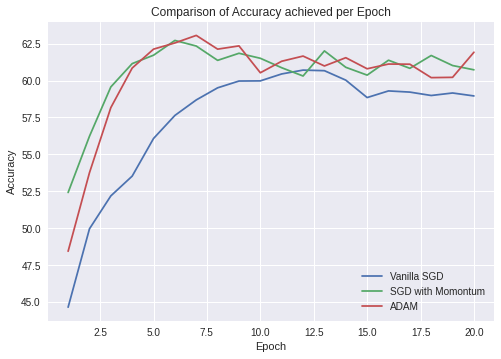

In [ ]:
#Result Comparision in Accuracy Achieved using different optimization strategies

plt.style.use("seaborn")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy achieved per Epoch")

x = [i for i in range(1,21)]


plt.plot(x,Acc_V_SGD,label="Vanilla SGD")
plt.plot(x,Acc_M_SGD,label="SGD with Momontum")
plt.plot(x,Acc_ADAM,label="ADAM")

plt.legend()
plt.savefig('./Optimization.png')
plt.show()

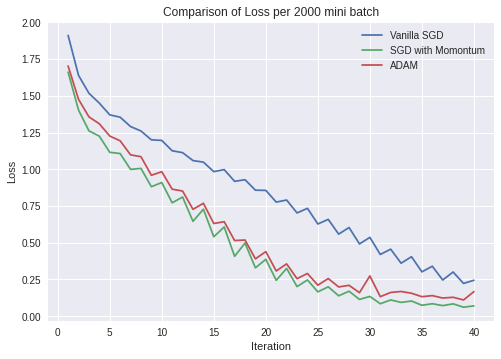

In [ ]:
plt.style.use("seaborn")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Comparison of Loss per 2000 mini batch")

x = [i for i in range(1,len(loss_V_SGD)+1)]


plt.plot(x,loss_V_SGD,label="Vanilla SGD")
plt.plot(x,loss_M_SGD,label="SGD with Momontum")
plt.plot(x,loss_ADAM,label="ADAM")

plt.legend()
plt.savefig('./Optimization_loss.png')
plt.show()

##Accuracy on test data by varying the ​ Normalization Techniques

- Batch Normalization
- Dropout 

In [ ]:
# Using Batch Normalization

del net
net = Net()
net.to(device)

from torchsummary import summary
summary(net,(3, 32, 32))


Acc_Batch_Normalization = []
loss_Batch_Normalization = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: 
            loss_Batch_Normalization.append(float(running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    temp = (100 * correct / total)
    Acc_Batch_Normalization.append(temp)
    print('%d Epoch Complete...'%(epoch+1))
print('Finished Training Using Batch Normalization')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 30, 30]             168
         MaxPool2d-2            [-1, 6, 15, 15]               0
            Conv2d-3            [-1, 8, 13, 13]             440
            Conv2d-4           [-1, 10, 13, 13]              90
            Conv2d-5           [-1, 12, 13, 13]             132
            Conv2d-6           [-1, 14, 13, 13]             182
       BatchNorm2d-7           [-1, 14, 13, 13]              28
            Conv2d-8           [-1, 16, 13, 13]             240
            Linear-9                 [-1, 1024]       2,769,920
           Linear-10                  [-1, 512]         524,800
      BatchNorm1d-11                  [-1, 512]           1,024
           Linear-12                  [-1, 256]         131,328
           Linear-13                   [-1, 10]           2,570
Total params: 3,430,922
Trainable param

In [ ]:
# Using Dropout
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() 
      
        self.conv1 = nn.Conv2d(3, 6, 3)  # 32x32x3 ---> 30x30x6  

        self.pool = nn.MaxPool2d(2, 2)   # 30x30x6 ---> 15x15x6
        self.dropout2 = nn.Dropout2d(p=0.2)
        self.dropout = nn.Dropout(p=0.2)

        self.conv2 = nn.Conv2d(6, 8, 3)  # 15x15x6 ---> 13x13x8
        
        self.conv3 = nn.Conv2d(8 , 10, 1) # 13x13x8 ---> 13x13x10

        self.conv4 = nn.Conv2d(10, 12, 1) # 13x13x10 ---> 13x13x12

        self.conv5 = nn.Conv2d(12, 14, 1) # 13x13x12 ---> 13x13x14
        
        self.conv6 = nn.Conv2d(14, 16, 1) # 13x13x14 ---> 13x13x16

        self.fc1 = nn.Linear(16 * 13 * 13, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.dropout2(F.relu(self.conv5(x)))
        x = F.relu(self.conv6(x))

        x = x.view(-1, 16*13*13)
        x = F.relu(self.fc1(x))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
        

del net
net = Net()
net.to(device)

from torchsummary import summary
summary(net,(3, 32, 32))


Acc_Dropout = []
loss_Dropout = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: 
            loss_Dropout.append(float(running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    temp = (100 * correct / total)
    Acc_Dropout.append(temp)
    print('%d Epoch Complete...'%(epoch+1))
print('Finished Training Using Dropout')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 30, 30]             168
         MaxPool2d-2            [-1, 6, 15, 15]               0
            Conv2d-3            [-1, 8, 13, 13]             440
            Conv2d-4           [-1, 10, 13, 13]              90
            Conv2d-5           [-1, 12, 13, 13]             132
            Conv2d-6           [-1, 14, 13, 13]             182
         Dropout2d-7           [-1, 14, 13, 13]               0
            Conv2d-8           [-1, 16, 13, 13]             240
            Linear-9                 [-1, 1024]       2,769,920
           Linear-10                  [-1, 512]         524,800
          Dropout-11                  [-1, 512]               0
           Linear-12                  [-1, 256]         131,328
           Linear-13                   [-1, 10]           2,570
Total params: 3,429,870
Trainable param

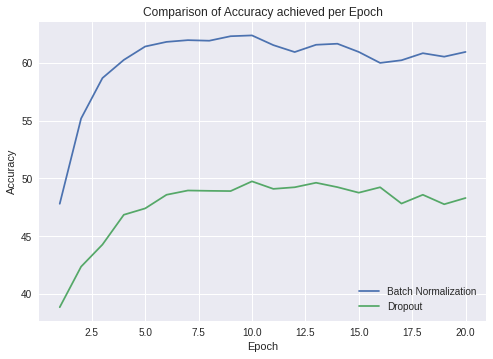

In [ ]:
#Result Comparision in Accuracy Achieved using different normalization strategies

plt.style.use("seaborn")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy achieved per Epoch")

x = [i for i in range(1,21)]


plt.plot(x,Acc_Batch_Normalization,label="Batch Normalization")
plt.plot(x,Acc_Dropout,label="Dropout")


plt.legend()
plt.savefig('./Normalization.png')
plt.show()

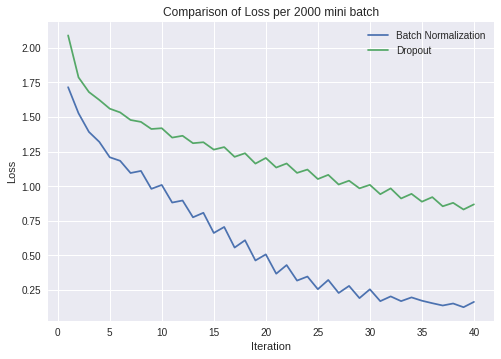

In [ ]:
plt.style.use("seaborn")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Comparison of Loss per 2000 mini batch")

x = [i for i in range(1,len(loss_V_SGD)+1)]


plt.plot(x,loss_Batch_Normalization,label="Batch Normalization")
plt.plot(x,loss_Dropout,label="Dropout")

plt.legend()
plt.savefig('./Normalization_loss.png')
plt.show()

## Accuracy on test data by varying ​ activation function ​ in between CNN layers​ ,
1. Identity.
2. Sigmoid.
3. ReLU. 
4. Tanh. 

In [ ]:
# Using Relu Activation function


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() 
      
        self.conv1 = nn.Conv2d(3, 6, 3)  # 32x32x3 ---> 30x30x6  

        self.pool = nn.MaxPool2d(2, 2)   # 30x30x6 ---> 15x15x6

        self.conv2 = nn.Conv2d(6, 8, 3)  # 15x15x6 ---> 13x13x8

        self.conv3 = nn.Conv2d(8 , 10, 1) # 13x13x8 ---> 13x13x10

        self.conv4 = nn.Conv2d(10, 12, 1) # 13x13x10 ---> 13x13x12

        self.conv5 = nn.Conv2d(12, 14, 1) # 13x13x12 ---> 13x13x14
        
        self.BatchNorm = nn.BatchNorm2d(14)
        self.conv6 = nn.Conv2d(14, 16, 1) # 13x13x14 ---> 13x13x16
    


        self.fc1 = nn.Linear(16 * 13 * 13, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.BatchNorm1 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.BatchNorm(F.relu(self.conv5(x)))
        x = F.relu(self.conv6(x))

        x = x.view(-1, 16*13*13)
        x = F.relu(self.fc1(x))
        x = self.BatchNorm1(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

del net
net = Net()
net.to(device)


Acc_Relu = []
loss_Relu = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: 
            loss_Relu.append(float(running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    temp = (100 * correct / total)
    Acc_Relu.append(temp)
    print('%d Epoch Complete...'%(epoch+1))
print('Finished Training Using Relu Activation Function')

1 Epoch Complete...
2 Epoch Complete...
3 Epoch Complete...
4 Epoch Complete...
5 Epoch Complete...
6 Epoch Complete...
7 Epoch Complete...
8 Epoch Complete...
9 Epoch Complete...
10 Epoch Complete...
11 Epoch Complete...
12 Epoch Complete...
13 Epoch Complete...
14 Epoch Complete...
15 Epoch Complete...
16 Epoch Complete...
17 Epoch Complete...
18 Epoch Complete...
19 Epoch Complete...
20 Epoch Complete...
Finished Training Using Relu Activation Function


In [ ]:
# Using Sigmoid Activation function


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() 
      
        self.conv1 = nn.Conv2d(3, 6, 3)  # 32x32x3 ---> 30x30x6  

        self.pool = nn.MaxPool2d(2, 2)   # 30x30x6 ---> 15x15x6

        self.conv2 = nn.Conv2d(6, 8, 3)  # 15x15x6 ---> 13x13x8

        self.conv3 = nn.Conv2d(8 , 10, 1) # 13x13x8 ---> 13x13x10

        self.conv4 = nn.Conv2d(10, 12, 1) # 13x13x10 ---> 13x13x12

        self.conv5 = nn.Conv2d(12, 14, 1) # 13x13x12 ---> 13x13x14
        
        self.BatchNorm = nn.BatchNorm2d(14)
        self.conv6 = nn.Conv2d(14, 16, 1) # 13x13x14 ---> 13x13x16
    


        self.fc1 = nn.Linear(16 * 13 * 13, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.BatchNorm1 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = F.sigmoid(self.conv2(x))
        x = F.sigmoid(self.conv3(x))
        x = F.sigmoid(self.conv4(x))
        x = self.BatchNorm(F.sigmoid(self.conv5(x)))
        x = F.sigmoid(self.conv6(x))

        x = x.view(-1, 16*13*13)
        x = F.sigmoid(self.fc1(x))
        x = self.BatchNorm1(F.sigmoid(self.fc2(x)))
        x = F.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x

del net
net = Net()
net.to(device)


Acc_Sigmoid = []
loss_Sigmoid = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: 
            loss_Sigmoid.append(float(running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    temp = (100 * correct / total)
    Acc_Sigmoid.append(temp)
    print('%d Epoch Complete...'%(epoch+1))
print('Finished Training Using Sigmoid Activation Function')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


1 Epoch Complete...
2 Epoch Complete...
3 Epoch Complete...
4 Epoch Complete...
5 Epoch Complete...
6 Epoch Complete...
7 Epoch Complete...
8 Epoch Complete...
9 Epoch Complete...
10 Epoch Complete...
11 Epoch Complete...
12 Epoch Complete...
13 Epoch Complete...
14 Epoch Complete...
15 Epoch Complete...
16 Epoch Complete...
17 Epoch Complete...
18 Epoch Complete...
19 Epoch Complete...
20 Epoch Complete...
Finished Training Using Sigmoid Activation Function


In [ ]:
# Using Tanh Activation function


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() 
      
        self.conv1 = nn.Conv2d(3, 6, 3)  # 32x32x3 ---> 30x30x6  

        self.pool = nn.MaxPool2d(2, 2)   # 30x30x6 ---> 15x15x6

        self.conv2 = nn.Conv2d(6, 8, 3)  # 15x15x6 ---> 13x13x8

        self.conv3 = nn.Conv2d(8 , 10, 1) # 13x13x8 ---> 13x13x10

        self.conv4 = nn.Conv2d(10, 12, 1) # 13x13x10 ---> 13x13x12

        self.conv5 = nn.Conv2d(12, 14, 1) # 13x13x12 ---> 13x13x14
        
        self.BatchNorm = nn.BatchNorm2d(14)
        self.conv6 = nn.Conv2d(14, 16, 1) # 13x13x14 ---> 13x13x16
    


        self.fc1 = nn.Linear(16 * 13 * 13, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.BatchNorm1 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.tanh(self.conv1(x)))
        x = F.tanh(self.conv2(x))
        x = F.tanh(self.conv3(x))
        x = F.tanh(self.conv4(x))
        x = self.BatchNorm(F.tanh(self.conv5(x)))
        x = F.tanh(self.conv6(x))

        x = x.view(-1, 16*13*13)
        x = F.tanh(self.fc1(x))
        x = self.BatchNorm1(F.tanh(self.fc2(x)))
        x = F.tanh(self.fc3(x))
        x = self.fc4(x)
        return x

del net
net = Net()
net.to(device)


Acc_Tanh = []
loss_Tanh = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: 
            loss_Tanh.append(float(running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    temp = (100 * correct / total)
    Acc_Tanh.append(temp)
    print('%d Epoch Complete...'%(epoch+1))
print('Finished Training Using Tanh Activation Function')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


1 Epoch Complete...
2 Epoch Complete...
3 Epoch Complete...
4 Epoch Complete...
5 Epoch Complete...
6 Epoch Complete...
7 Epoch Complete...
8 Epoch Complete...
9 Epoch Complete...
10 Epoch Complete...
11 Epoch Complete...
12 Epoch Complete...
13 Epoch Complete...
14 Epoch Complete...
15 Epoch Complete...
16 Epoch Complete...
17 Epoch Complete...
18 Epoch Complete...
19 Epoch Complete...
20 Epoch Complete...
Finished Training Using Tanh Activation Function


In [ ]:
# Using Identity Activation function


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() 
      
        self.conv1 = nn.Conv2d(3, 6, 3)  # 32x32x3 ---> 30x30x6  

        self.pool = nn.MaxPool2d(2, 2)   # 30x30x6 ---> 15x15x6

        self.conv2 = nn.Conv2d(6, 8, 3)  # 15x15x6 ---> 13x13x8

        self.conv3 = nn.Conv2d(8 , 10, 1) # 13x13x8 ---> 13x13x10

        self.conv4 = nn.Conv2d(10, 12, 1) # 13x13x10 ---> 13x13x12

        self.conv5 = nn.Conv2d(12, 14, 1) # 13x13x12 ---> 13x13x14
        
        self.BatchNorm = nn.BatchNorm2d(14)
        self.conv6 = nn.Conv2d(14, 16, 1) # 13x13x14 ---> 13x13x16
    


        self.fc1 = nn.Linear(16 * 13 * 13, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.BatchNorm1 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.BatchNorm(F.tanh(self.conv5(x)))
        x = self.conv6(x)

        x = x.view(-1, 16*13*13)
        x = self.fc1(x)
        x = self.BatchNorm1(F.tanh(self.fc2(x)))
        x = self.fc3(x)
        x = self.fc4(x)
        return x

del net
net = Net()
net.to(device)


Acc_Identity = []
loss_Identity = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: 
            loss_Identity.append(float(running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    temp = (100 * correct / total)
    Acc_Identity.append(temp)
    print('%d Epoch Complete...'%(epoch+1))
print('Finished Training Using Identity Activation Function')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


1 Epoch Complete...
2 Epoch Complete...
3 Epoch Complete...
4 Epoch Complete...
5 Epoch Complete...
6 Epoch Complete...
7 Epoch Complete...
8 Epoch Complete...
9 Epoch Complete...
10 Epoch Complete...
11 Epoch Complete...
12 Epoch Complete...
13 Epoch Complete...
14 Epoch Complete...
15 Epoch Complete...
16 Epoch Complete...
17 Epoch Complete...
18 Epoch Complete...
19 Epoch Complete...
20 Epoch Complete...
Finished Training Using Identity Activation Function


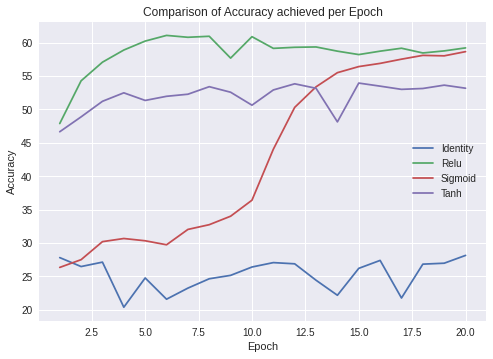

In [ ]:
#Result Comparision in Accuracy Achieved using different normalization strategies

plt.style.use("seaborn")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy achieved per Epoch")

x = [i for i in range(1,21)]


plt.plot(x,Acc_Identity,label="Identity")
plt.plot(x,Acc_Relu,label="Relu")
plt.plot(x,Acc_Sigmoid,label="Sigmoid")
plt.plot(x,Acc_Tanh,label="Tanh")


plt.legend()
plt.savefig('./Activation.png')
plt.show()

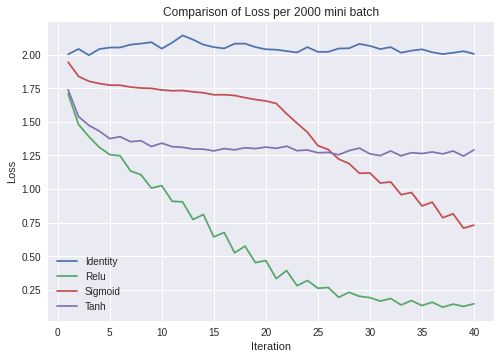

In [ ]:
plt.style.use("seaborn")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Comparison of Loss per 2000 mini batch")

x = [i for i in range(1,len(loss_V_SGD)+1)]


plt.plot(x,loss_Identity,label="Identity")
plt.plot(x,loss_Relu,label="Relu")
plt.plot(x,loss_Sigmoid,label="Sigmoid")
plt.plot(x,loss_Tanh,label="Tanh")

plt.legend()
plt.savefig('./Acctivation_loss.png')
plt.show()

## iv. Accuracy on test data by varying the ​ loss functions

- Cross-Entropy Loss
- MSELoss
- L1 Loss 

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() 
      
        self.conv1 = nn.Conv2d(3, 6, 3)  # 32x32x3 ---> 30x30x6  

        self.pool = nn.MaxPool2d(2, 2)   # 30x30x6 ---> 15x15x6
        #self.dropout = nn.Dropout2d(p=0.2)

        self.conv2 = nn.Conv2d(6, 8, 3)  # 15x15x6 ---> 13x13x8
        

        self.conv3 = nn.Conv2d(8 , 10, 1) # 13x13x8 ---> 13x13x10

        self.conv4 = nn.Conv2d(10, 12, 1) # 13x13x10 ---> 13x13x12

        self.conv5 = nn.Conv2d(12, 14, 1) # 13x13x12 ---> 13x13x14
        
        self.BatchNorm = nn.BatchNorm2d(14)
        self.conv6 = nn.Conv2d(14, 16, 1) # 13x13x14 ---> 13x13x16
    


        self.fc1 = nn.Linear(16 * 13 * 13, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.BatchNorm1 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.BatchNorm(F.relu(self.conv5(x)))
        x = F.relu(self.conv6(x))

        x = x.view(-1, 16*13*13)
        x = F.relu(self.fc1(x))
        x = self.BatchNorm1(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [ ]:
# Using Cross-Entrophy Loss
try :
  del net
except : 
  pass

net = Net()
net.to(device)


Acc_Cross_Entrophy = []
loss_Cross_Entrophy = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: 
            loss_Cross_Entrophy.append(float(running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    temp = (100 * correct / total)
    Acc_Cross_Entrophy.append(temp)
    print('%d Epoch Complete...'%(epoch+1))
print('Finished Training Using Cross Entrophy Loss')

1 Epoch Complete...
2 Epoch Complete...
3 Epoch Complete...
4 Epoch Complete...
5 Epoch Complete...
6 Epoch Complete...
7 Epoch Complete...
8 Epoch Complete...
9 Epoch Complete...
10 Epoch Complete...
11 Epoch Complete...
12 Epoch Complete...
13 Epoch Complete...
14 Epoch Complete...
15 Epoch Complete...
Finished Training Using Cross Entrophy Loss


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() 
      
        self.conv1 = nn.Conv2d(3, 6, 3)  # 32x32x3 ---> 30x30x6  

        self.pool = nn.MaxPool2d(2, 2)   # 30x30x6 ---> 15x15x6
        #self.dropout = nn.Dropout2d(p=0.2)

        self.conv2 = nn.Conv2d(6, 8, 3)  # 15x15x6 ---> 13x13x8
        

        self.conv3 = nn.Conv2d(8 , 10, 1) # 13x13x8 ---> 13x13x10

        self.conv4 = nn.Conv2d(10, 12, 1) # 13x13x10 ---> 13x13x12

        self.conv5 = nn.Conv2d(12, 14, 1) # 13x13x12 ---> 13x13x14
        
        self.BatchNorm = nn.BatchNorm2d(14)
        self.conv6 = nn.Conv2d(14, 16, 1) # 13x13x14 ---> 13x13x16
    


        self.fc1 = nn.Linear(16 * 13 * 13, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.BatchNorm1 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.BatchNorm(F.relu(self.conv5(x)))
        x = F.relu(self.conv6(x))

        x = x.view(-1, 16*13*13)
        x = F.relu(self.fc1(x))
        x = self.BatchNorm1(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.softmax(x)

In [ ]:
try :
  del net
except : 
  pass

net = Net()
net.to(device)


Acc_MSE = []
loss_MSE = []

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        inputs, labels = data[0].to(device), (data[1].float()).to(device)


        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels.view(-1,1))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: 
            loss_MSE.append(float(running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    temp = (100 * correct / total)
    Acc_MSE.append(temp)
    print('%d Epoch Complete...'%(epoch+1))
print('Finished Training Using MSE Loss')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


1 Epoch Complete...
2 Epoch Complete...
3 Epoch Complete...
4 Epoch Complete...
5 Epoch Complete...
6 Epoch Complete...
7 Epoch Complete...
8 Epoch Complete...
9 Epoch Complete...
10 Epoch Complete...
11 Epoch Complete...
12 Epoch Complete...
13 Epoch Complete...
14 Epoch Complete...
15 Epoch Complete...
Finished Training Using MSE Loss


In [ ]:
# Using L1 Loss

try :
  del net
except : 
  pass

net = Net()
net.to(device)


Acc_L1 = []
loss_L1 = []

criterion = nn.L1Loss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        inputs, labels = data[0].to(device), (data[1].float()).to(device)


        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels.view(-1,1))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: 
            loss_L1.append(float(running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    temp = (100 * correct / total)
    Acc_L1.append(temp)
    print('%d Epoch Complete...'%(epoch+1))
print('Finished Training Using L1 Loss')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:94: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


1 Epoch Complete...
2 Epoch Complete...
3 Epoch Complete...
4 Epoch Complete...
5 Epoch Complete...
6 Epoch Complete...
7 Epoch Complete...
8 Epoch Complete...
9 Epoch Complete...
10 Epoch Complete...
11 Epoch Complete...
12 Epoch Complete...
13 Epoch Complete...
14 Epoch Complete...
15 Epoch Complete...
Finished Training Using L1 Loss


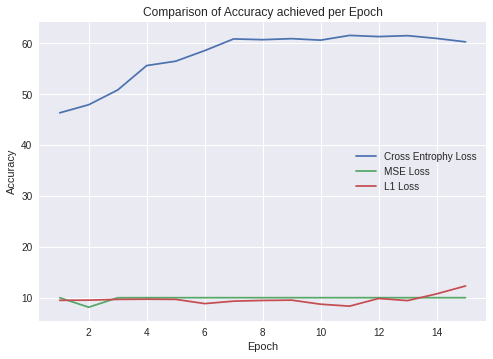

In [ ]:
#Result Comparision in Accuracy Achieved using different Loss Function

plt.style.use("seaborn")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy achieved per Epoch")

x = [i for i in range(1,16)]


plt.plot(x,Acc_Cross_Entrophy,label="Cross Entrophy Loss")
plt.plot(x,Acc_MSE,label="MSE Loss")
plt.plot(x,Acc_L1,label="L1 Loss")



plt.legend()
plt.savefig('./LOSSFunction.png')
plt.show()

## Find the best configuration for your CNN (a combination of Optimization Technique, Normalization technique, activation function and Loss function),support your claim.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() 
      
        self.conv1 = nn.Conv2d(3, 6, 3)  # 32x32x3 ---> 30x30x6  

        self.pool = nn.MaxPool2d(2, 2)   # 30x30x6 ---> 15x15x6
        #self.dropout = nn.Dropout2d(p=0.2)

        self.conv2 = nn.Conv2d(6, 8, 3)  # 15x15x6 ---> 13x13x8
        

        self.conv3 = nn.Conv2d(8 , 10, 1) # 13x13x8 ---> 13x13x10

        self.conv4 = nn.Conv2d(10, 12, 1) # 13x13x10 ---> 13x13x12

        self.conv5 = nn.Conv2d(12, 14, 1) # 13x13x12 ---> 13x13x14
        
        self.BatchNorm = nn.BatchNorm2d(14)
        self.conv6 = nn.Conv2d(14, 16, 1) # 13x13x14 ---> 13x13x16
    


        self.fc1 = nn.Linear(16 * 13 * 13, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.BatchNorm1 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.BatchNorm(F.relu(self.conv5(x)))
        x = F.relu(self.conv6(x))

        x = x.view(-1, 16*13*13)
        x = F.relu(self.fc1(x))
        x = self.BatchNorm1(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [ ]:
del net
net = Net()
net.to(device)

from torchsummary import summary
summary(net,(3, 32, 32))


Acc_ = []
loss_ = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: 
            loss_.append(float(running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    temp = (100 * correct / total)
    Acc_.append(temp)
    print('%d Epoch Complete...'%(epoch+1))
print('Finished Training Using Best Model')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 30, 30]             168
         MaxPool2d-2            [-1, 6, 15, 15]               0
            Conv2d-3            [-1, 8, 13, 13]             440
            Conv2d-4           [-1, 10, 13, 13]              90
            Conv2d-5           [-1, 12, 13, 13]             132
            Conv2d-6           [-1, 14, 13, 13]             182
       BatchNorm2d-7           [-1, 14, 13, 13]              28
            Conv2d-8           [-1, 16, 13, 13]             240
            Linear-9                 [-1, 1024]       2,769,920
           Linear-10                  [-1, 512]         524,800
      BatchNorm1d-11                  [-1, 512]           1,024
           Linear-12                  [-1, 256]         131,328
           Linear-13                   [-1, 10]           2,570
Total params: 3,430,922
Trainable param

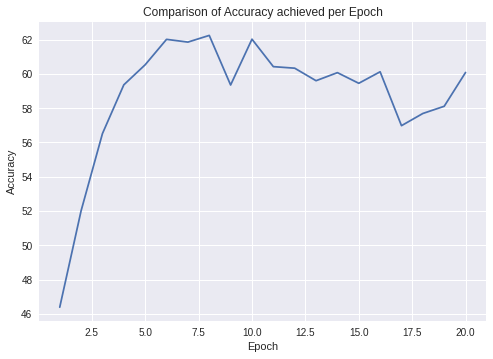

In [ ]:
#Result Comparision in Accuracy Achieved using Best Combination.

plt.style.use("seaborn")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy achieved per Epoch")

x = [i for i in range(1,21)]


plt.plot(x,Acc_)

plt.savefig('./Best.png')
plt.show()